## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12195678686168077132
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4874240000
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8732971965652547099
physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 87s 1us/step


In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [6]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.9255 - acc: 0.3035 - val_loss: 1.7534 - val_acc: 0.3769
Epoch 2/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.7054 - acc: 0.3889 - val_loss: 1.7217 - val_acc: 0.3864
Epoch 3/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.6237 - acc: 0.4203 - val_loss: 1.6515 - val_acc: 0.4066
Epoch 4/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.5589 - acc: 0.4436 - val_loss: 1.5662 - val_acc: 0.4398
Epoch 5/500
50000/50000 [==============================] - 2s 44us/step - loss: 1.5018 - acc: 0.4652 - val_loss: 1.5392 - val_acc: 0.4509
Epoch 6/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.4614 - acc: 0.4802 - val_loss: 1.4925 - val_acc: 0.4692
Epoch 7/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.4334 - acc: 0.4893 - val_loss: 1.4675 -

50000/50000 [==============================] - 2s 44us/step - loss: 0.5233 - acc: 0.8124 - val_loss: 2.0862 - val_acc: 0.5102
Epoch 60/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.4981 - acc: 0.8203 - val_loss: 2.1732 - val_acc: 0.4998
Epoch 61/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.5000 - acc: 0.8216 - val_loss: 2.0684 - val_acc: 0.5118
Epoch 62/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.4933 - acc: 0.8238 - val_loss: 2.0909 - val_acc: 0.5205
Epoch 63/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.4763 - acc: 0.8302 - val_loss: 2.1750 - val_acc: 0.5145
Epoch 64/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.4780 - acc: 0.8293 - val_loss: 2.2337 - val_acc: 0.5084
Epoch 65/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.4554 - acc: 0.8378 - val_loss: 2.2020 - val_acc: 0.5134
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.2226 - acc: 0.9204 - val_loss: 3.5586 - val_acc: 0.4945
Epoch 119/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.2631 - acc: 0.9067 - val_loss: 3.5080 - val_acc: 0.4940
Epoch 120/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.2445 - acc: 0.9129 - val_loss: 3.4758 - val_acc: 0.5056
Epoch 121/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.2120 - acc: 0.9250 - val_loss: 3.5421 - val_acc: 0.4991
Epoch 122/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.2306 - acc: 0.9169 - val_loss: 3.6234 - val_acc: 0.4945
Epoch 123/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1912 - acc: 0.9323 - val_loss: 3.5904 - val_acc: 0.4969
Epoch 124/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.2209 - acc: 0.9217 - val_loss: 3.5674 - val_acc: 0.4941
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 44us/step - loss: 0.1648 - acc: 0.9429 - val_loss: 4.1394 - val_acc: 0.4973
Epoch 177/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1564 - acc: 0.9447 - val_loss: 4.2088 - val_acc: 0.4966
Epoch 178/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1384 - acc: 0.9514 - val_loss: 4.1681 - val_acc: 0.4981
Epoch 179/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1365 - acc: 0.9523 - val_loss: 4.2191 - val_acc: 0.4993
Epoch 180/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1994 - acc: 0.9309 - val_loss: 4.2502 - val_acc: 0.4860
Epoch 181/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.2153 - acc: 0.9277 - val_loss: 4.2662 - val_acc: 0.4951
Epoch 182/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1341 - acc: 0.9531 - val_loss: 4.2492 - val_acc: 0.4832
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 0.0765 - acc: 0.9732 - val_loss: 4.5458 - val_acc: 0.4970
Epoch 235/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1447 - acc: 0.9516 - val_loss: 4.6447 - val_acc: 0.4895
Epoch 236/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1239 - acc: 0.9578 - val_loss: 4.5539 - val_acc: 0.4964
Epoch 237/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1008 - acc: 0.9650 - val_loss: 4.6906 - val_acc: 0.4968
Epoch 238/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1907 - acc: 0.9381 - val_loss: 4.6701 - val_acc: 0.4870
Epoch 239/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.1657 - acc: 0.9454 - val_loss: 4.5764 - val_acc: 0.4929
Epoch 240/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1098 - acc: 0.9616 - val_loss: 4.7084 - val_acc: 0.4916
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 44us/step - loss: 0.0939 - acc: 0.9677 - val_loss: 4.9249 - val_acc: 0.4857
Epoch 293/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1493 - acc: 0.9503 - val_loss: 4.8236 - val_acc: 0.4902
Epoch 294/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1705 - acc: 0.9458 - val_loss: 4.8389 - val_acc: 0.4895
Epoch 295/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1187 - acc: 0.9602 - val_loss: 4.7435 - val_acc: 0.4943
Epoch 296/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1132 - acc: 0.9622 - val_loss: 4.8237 - val_acc: 0.4926
Epoch 297/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0845 - acc: 0.9709 - val_loss: 4.8600 - val_acc: 0.4899
Epoch 298/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0491 - acc: 0.9837 - val_loss: 4.9385 - val_acc: 0.4951
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 0.0564 - acc: 0.9808 - val_loss: 5.0043 - val_acc: 0.4921
Epoch 351/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0472 - acc: 0.9847 - val_loss: 5.0162 - val_acc: 0.4957
Epoch 352/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0431 - acc: 0.9858 - val_loss: 4.9979 - val_acc: 0.4868
Epoch 353/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1821 - acc: 0.9432 - val_loss: 5.0294 - val_acc: 0.4956
Epoch 354/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1396 - acc: 0.9554 - val_loss: 4.9169 - val_acc: 0.4947
Epoch 355/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0576 - acc: 0.9806 - val_loss: 4.9710 - val_acc: 0.4944
Epoch 356/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0368 - acc: 0.9879 - val_loss: 5.0268 - val_acc: 0.4886
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 44us/step - loss: 0.0940 - acc: 0.9694 - val_loss: 5.1088 - val_acc: 0.4965
Epoch 409/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0587 - acc: 0.9806 - val_loss: 5.0987 - val_acc: 0.4935
Epoch 410/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0289 - acc: 0.9907 - val_loss: 5.1215 - val_acc: 0.5004
Epoch 411/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0497 - acc: 0.9837 - val_loss: 5.2124 - val_acc: 0.4922
Epoch 412/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1599 - acc: 0.9524 - val_loss: 5.1167 - val_acc: 0.4961
Epoch 413/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.1105 - acc: 0.9641 - val_loss: 5.1767 - val_acc: 0.4875
Epoch 414/500
50000/50000 [==============================] - 2s 44us/step - loss: 0.0932 - acc: 0.9700 - val_loss: 5.4134 - val_acc: 0.4753
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 0.0562 - acc: 0.9813 - val_loss: 5.1769 - val_acc: 0.4973
Epoch 467/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0508 - acc: 0.9824 - val_loss: 5.1145 - val_acc: 0.4962
Epoch 468/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0454 - acc: 0.9851 - val_loss: 5.1455 - val_acc: 0.4928
Epoch 469/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0878 - acc: 0.9712 - val_loss: 5.1421 - val_acc: 0.4894
Epoch 470/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.1038 - acc: 0.9667 - val_loss: 5.1714 - val_acc: 0.4881
Epoch 471/500
50000/50000 [==============================] - 2s 45us/step - loss: 0.0710 - acc: 0.9768 - val_loss: 5.3645 - val_acc: 0.4884
Epoch 472/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.1017 - acc: 0.9671 - val_loss: 5.3029 - val_acc: 0.4875
Epoch 473/500
50000/50000 [=======

Populating the interactive namespace from numpy and matplotlib


C:\Users\William\Anaconda3\envs\cd1\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


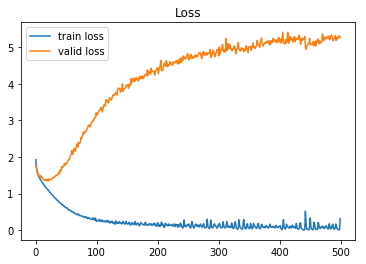

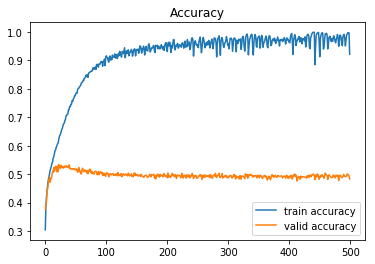

In [9]:
%pylab inline
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [12]:
model = build_mlp()

# from keras import optimizers
# opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.8641 - acc: 0.3335 - val_loss: 1.6945 - val_acc: 0.4007
Epoch 2/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.6432 - acc: 0.4182 - val_loss: 1.6236 - val_acc: 0.4217
Epoch 3/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.5535 - acc: 0.4494 - val_loss: 1.5938 - val_acc: 0.4328
Epoch 4/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.4942 - acc: 0.4721 - val_loss: 1.5114 - val_acc: 0.4633
Epoch 5/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.4379 - acc: 0.4899 - val_loss: 1.5652 - val_acc: 0.4499
Epoch 6/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.3984 - acc: 0.5063 - val_loss: 1.5353 - val_acc: 0.4632
Epoch 7/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.3662 - acc: 0.5155 - val_loss: 1.5446 - 

50000/50000 [==============================] - 2s 42us/step - loss: 0.3078 - acc: 0.8902 - val_loss: 2.3305 - val_acc: 0.5212
Epoch 60/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.2964 - acc: 0.8949 - val_loss: 2.3326 - val_acc: 0.5263
Epoch 61/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.2875 - acc: 0.8999 - val_loss: 2.3354 - val_acc: 0.5309
Epoch 62/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.2715 - acc: 0.9053 - val_loss: 2.3924 - val_acc: 0.5248
Epoch 63/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.2677 - acc: 0.9053 - val_loss: 2.4094 - val_acc: 0.5300
Epoch 64/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.2464 - acc: 0.9147 - val_loss: 2.3835 - val_acc: 0.5186
Epoch 65/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.2430 - acc: 0.9151 - val_loss: 2.7326 - val_acc: 0.4890
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.1019 - acc: 0.9636 - val_loss: 3.5137 - val_acc: 0.5311
Epoch 119/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.1033 - acc: 0.9631 - val_loss: 3.7967 - val_acc: 0.5174
Epoch 120/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.1044 - acc: 0.9636 - val_loss: 3.7373 - val_acc: 0.5188
Epoch 121/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.0885 - acc: 0.9696 - val_loss: 3.6652 - val_acc: 0.5219
Epoch 122/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0796 - acc: 0.9724 - val_loss: 3.6661 - val_acc: 0.5382
Epoch 123/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.0620 - acc: 0.9781 - val_loss: 3.7203 - val_acc: 0.5325
Epoch 124/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0466 - acc: 0.9849 - val_loss: 3.6363 - val_acc: 0.5374
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 41us/step - loss: 0.0277 - acc: 0.9905 - val_loss: 3.9498 - val_acc: 0.5480
Epoch 177/500
50000/50000 [==============================] - 2s 42us/step - loss: 0.0094 - acc: 0.9975 - val_loss: 3.9945 - val_acc: 0.5522
Epoch 178/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0042 - acc: 0.9992 - val_loss: 4.0043 - val_acc: 0.5501
Epoch 179/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0066 - acc: 0.9984 - val_loss: 3.9812 - val_acc: 0.5488
Epoch 180/500
50000/50000 [==============================] - 2s 43us/step - loss: 0.0025 - acc: 0.9996 - val_loss: 3.9976 - val_acc: 0.5506
Epoch 181/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0016 - acc: 0.9999 - val_loss: 4.0381 - val_acc: 0.5549
Epoch 182/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0011 - acc: 0.9999 - val_loss: 4.0400 - val_acc: 0.5539
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 42us/step - loss: 1.8281e-04 - acc: 1.0000 - val_loss: 4.1967 - val_acc: 0.5551
Epoch 234/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.8096e-04 - acc: 1.0000 - val_loss: 4.1983 - val_acc: 0.5545
Epoch 235/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.7944e-04 - acc: 1.0000 - val_loss: 4.1993 - val_acc: 0.5548
Epoch 236/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.7795e-04 - acc: 1.0000 - val_loss: 4.2003 - val_acc: 0.5554
Epoch 237/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.7585e-04 - acc: 1.0000 - val_loss: 4.2009 - val_acc: 0.5545
Epoch 238/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.7352e-04 - acc: 1.0000 - val_loss: 4.2038 - val_acc: 0.5548
Epoch 239/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.7290e-04 - acc: 1.0000 - val_loss: 4.2056 - val_acc: 0.5549
Epoch 

Epoch 290/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.1771e-04 - acc: 1.0000 - val_loss: 4.2561 - val_acc: 0.5562
Epoch 291/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.1681e-04 - acc: 1.0000 - val_loss: 4.2554 - val_acc: 0.5565
Epoch 292/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1648e-04 - acc: 1.0000 - val_loss: 4.2578 - val_acc: 0.5565
Epoch 293/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.1594e-04 - acc: 1.0000 - val_loss: 4.2577 - val_acc: 0.5563
Epoch 294/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1497e-04 - acc: 1.0000 - val_loss: 4.2601 - val_acc: 0.5563
Epoch 295/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.1421e-04 - acc: 1.0000 - val_loss: 4.2604 - val_acc: 0.5564
Epoch 296/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1361e-04 - acc: 1.0000 - val_loss: 4.2610 - val_acc:

Epoch 347/500
50000/50000 [==============================] - 2s 41us/step - loss: 8.8679e-05 - acc: 1.0000 - val_loss: 4.2947 - val_acc: 0.5563
Epoch 348/500
50000/50000 [==============================] - 2s 41us/step - loss: 8.8429e-05 - acc: 1.0000 - val_loss: 4.2955 - val_acc: 0.5567
Epoch 349/500
50000/50000 [==============================] - 2s 41us/step - loss: 8.8054e-05 - acc: 1.0000 - val_loss: 4.2962 - val_acc: 0.5562
Epoch 350/500
50000/50000 [==============================] - 2s 41us/step - loss: 8.7515e-05 - acc: 1.0000 - val_loss: 4.2959 - val_acc: 0.5569
Epoch 351/500
50000/50000 [==============================] - 2s 41us/step - loss: 8.6988e-05 - acc: 1.0000 - val_loss: 4.2968 - val_acc: 0.5570
Epoch 352/500
50000/50000 [==============================] - 2s 42us/step - loss: 8.7025e-05 - acc: 1.0000 - val_loss: 4.2981 - val_acc: 0.5564
Epoch 353/500
50000/50000 [==============================] - 2s 43us/step - loss: 8.6219e-05 - acc: 1.0000 - val_loss: 4.2980 - val_acc:

Epoch 404/500
50000/50000 [==============================] - 2s 42us/step - loss: 7.1862e-05 - acc: 1.0000 - val_loss: 4.3233 - val_acc: 0.5567
Epoch 405/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.1552e-05 - acc: 1.0000 - val_loss: 4.3247 - val_acc: 0.5566
Epoch 406/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.1395e-05 - acc: 1.0000 - val_loss: 4.3244 - val_acc: 0.5568
Epoch 407/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.0962e-05 - acc: 1.0000 - val_loss: 4.3249 - val_acc: 0.5565
Epoch 408/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.1047e-05 - acc: 1.0000 - val_loss: 4.3252 - val_acc: 0.5568
Epoch 409/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.0710e-05 - acc: 1.0000 - val_loss: 4.3254 - val_acc: 0.5572
Epoch 410/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.0468e-05 - acc: 1.0000 - val_loss: 4.3263 - val_acc:

Epoch 461/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.0719e-05 - acc: 1.0000 - val_loss: 4.3471 - val_acc: 0.5562
Epoch 462/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.0549e-05 - acc: 1.0000 - val_loss: 4.3475 - val_acc: 0.5571
Epoch 463/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.0328e-05 - acc: 1.0000 - val_loss: 4.3474 - val_acc: 0.5567
Epoch 464/500
50000/50000 [==============================] - 2s 42us/step - loss: 6.0323e-05 - acc: 1.0000 - val_loss: 4.3481 - val_acc: 0.5566
Epoch 465/500
50000/50000 [==============================] - 2s 41us/step - loss: 6.0148e-05 - acc: 1.0000 - val_loss: 4.3476 - val_acc: 0.5565
Epoch 466/500
50000/50000 [==============================] - 2s 42us/step - loss: 5.9921e-05 - acc: 1.0000 - val_loss: 4.3490 - val_acc: 0.5565
Epoch 467/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.9870e-05 - acc: 1.0000 - val_loss: 4.3483 - val_acc:

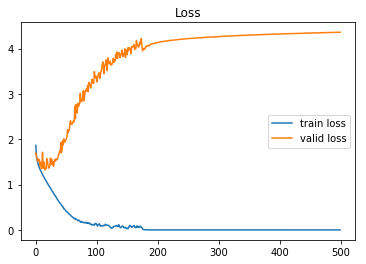

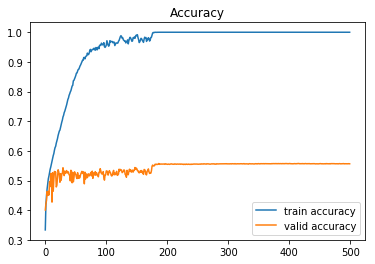

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()